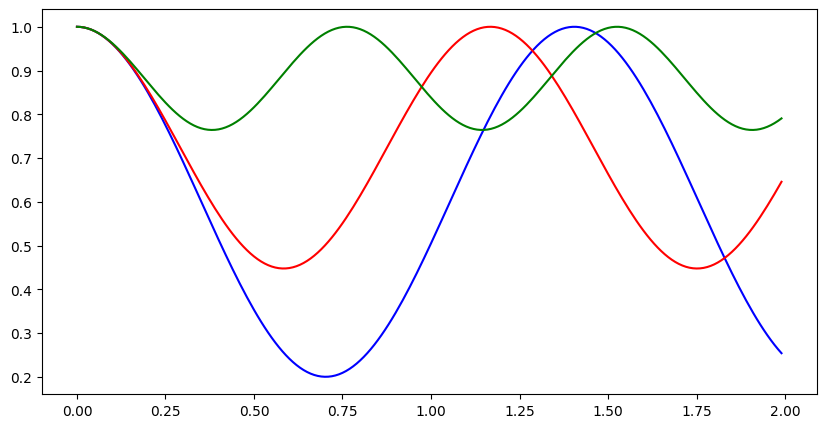

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def exact_time(lam,tt):
    Mt=(1 + 2*lam**2 + np.cos(4*tt*np.sqrt(1 + lam**2)))/(2 + 2*lam**2)
    return Mt
vexact_t = np.vectorize(exact_time)
t=np.arange(0.0,2.0,0.01)
tt=np.arange(0.0,2.25,0.25)
plt.figure(figsize=(10,5))
plt.plot(t,vexact_t(0.5,t),'b',label='$\lambda=0.5$')
plt.plot(t,vexact_t(0.9,t),'r',label='$\lambda=0.9$')
plt.plot(t,vexact_t(1.8,t),'g',label='$\lambda=1.8$')

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.circuit import Parameter


lambdavar = 0
gammavar = 0

# Change theta
theta0 = np.arccos((-lambdavar + np.cos(2*np.pi * 0 / 8))/ np.sqrt((lambdavar - np.cos(2*np.pi*0/8))**2 + gammavar**2 * np.sin(2*np.pi*0/8)**2))
theta1 = np.arccos((-lambdavar + np.cos(2*np.pi * 1 / 8))/ np.sqrt((lambdavar - np.cos(2*np.pi*1/8))**2 + gammavar**2 * np.sin(2*np.pi*1/8)**2))
theta2 = np.arccos((-lambdavar + np.cos(2*np.pi * 2 / 8))/ np.sqrt((lambdavar - np.cos(2*np.pi*2/8))**2 + gammavar**2 * np.sin(2*np.pi*2/8)**2))
theta3 = np.arccos((-lambdavar + np.cos(2*np.pi * 3 / 8))/ np.sqrt((lambdavar - np.cos(2*np.pi*3/8))**2 + gammavar**2 * np.sin(2*np.pi*3/8)**2))
# Define B, F, and SWAP gates
F0 = np.array([[1, 0, 0, 0],
                    [0, 1 / 2**0.5, np.exp(1j*2*np.pi * 0 /8)  / 2**0.5, 0],
                    [0, 1 / 2**0.5, -np.exp(1j*2*np.pi * 0 /8) / 2**0.5, 0],
                    [0, 0, 0, -np.exp(1j*2*np.pi * 0 /8)]], dtype=complex)

F1 = np.array([[1, 0, 0, 0],
                    [0, 1 / 2**0.5, np.exp(1j*2*np.pi * 1 /8)  / 2**0.5, 0],
                    [0, 1 / 2**0.5, -np.exp(1j*2*np.pi * 1 /8) / 2**0.5, 0],
                    [0, 0, 0, -np.exp(1j*2*np.pi * 1 /8)]], dtype=complex)

F2 = np.array([[1, 0, 0, 0],
                    [0, 1 / 2**0.5, np.exp(1j*2*np.pi * 2 /8)  / 2**0.5, 0],
                    [0, 1 / 2**0.5, -np.exp(1j*2*np.pi * 2 /8) / 2**0.5, 0],
                    [0, 0, 0, -np.exp(1j*2*np.pi * 2 /8)]], dtype=complex)
F3 = np.array([[1, 0, 0, 0],
                    [0, 1 / 2**0.5, np.exp(1j*2*np.pi * 3 /8)  / 2**0.5, 0],
                    [0, 1 / 2**0.5, -np.exp(1j*2*np.pi * 3 /8) / 2**0.5, 0],
                    [0, 0, 0, -np.exp(1j*2*np.pi * 3 /8)]], dtype=complex)
    
B0 = np.array([[np.cos(theta0), 0, 0, 1j * np.sin(theta0)],
                    [0, 1, 0, 0],
                    [0, 0, 1, 0],
                    [1j * np.sin(theta0), 0, 0, np.cos(theta0)]], dtype=complex)
B1 = np.array([[np.cos(theta1), 0, 0, 1j * np.sin(theta1)],
                    [0, 1, 0, 0],
                    [0, 0, 1, 0],
                    [1j * np.sin(theta1), 0, 0, np.cos(theta1)]], dtype=complex)
B2 = np.array([[np.cos(theta2), 0, 0, 1j * np.sin(theta2)],
                    [0, 1, 0, 0],
                    [0, 0, 1, 0],
                    [1j * np.sin(theta2), 0, 0, np.cos(theta2)]], dtype=complex)
B3 = np.array([[np.cos(theta3), 0, 0, 1j * np.sin(theta3)],
                    [0, 1, 0, 0],
                    [0, 0, 1, 0],
                    [1j * np.sin(theta3), 0, 0, np.cos(theta3)]], dtype=complex)

SWAP = np.array([[1, 0, 0, 0],
                        [0, 0, 1, 0],
                        [0, 1, 0, 0],
                        [0, 0, 0, -1]], dtype=complex)
f0gate = Operator(F0)
f1gate = Operator(F1)
f2gate = Operator(F2)
f3gate = Operator(F3)
b0gate = Operator(B0)
b1gate = Operator(B1)
b2gate = Operator(B2)
b3gate = Operator(B3)
swapgate = Operator(SWAP)
    
    
def digit_sum(n):
    num_str = str(n)
    sum = 0
    for i in range(0, len(num_str)):
        sum += int(num_str[i])
    return sum

def resetarrays(lambdavar, gammavar):
    # Change theta
    theta0 = np.arccos((-lambdavar + np.cos(2*np.pi * 0 / 8))/ np.sqrt((lambdavar - np.cos(2*np.pi*0/8))**2 + gammavar**2 * (np.sin(2*np.pi*0/8)**2)))
    theta1 = np.arccos((-lambdavar + np.cos(2*np.pi * 1 / 8))/ np.sqrt((lambdavar - np.cos(2*np.pi*1/8))**2 + gammavar**2 * (np.sin(2*np.pi*1/8)**2)))
    theta2 = np.arccos((-lambdavar + np.cos(2*np.pi * 2 / 8))/ np.sqrt((lambdavar - np.cos(2*np.pi*2/8))**2 + gammavar**2 * (np.sin(2*np.pi*2/8)**2)))
    theta3 = np.arccos((-lambdavar + np.cos(2*np.pi * 3 / 8))/ np.sqrt((lambdavar - np.cos(2*np.pi*3/8))**2 + gammavar**2 * (np.sin(2*np.pi*3/8)**2)))
    # Define B, F, and SWAP gates
        
    B0 = np.array([[np.cos(theta0), 0, 0, 1j * np.sin(theta0)],
                        [0, 1, 0, 0],
                        [0, 0, 1, 0],
                        [1j * np.sin(theta0), 0, 0, np.cos(theta0)]], dtype=complex)
    B1 = np.array([[np.cos(theta1), 0, 0, 1j * np.sin(theta1)],
                        [0, 1, 0, 0],
                        [0, 0, 1, 0],
                        [1j * np.sin(theta1), 0, 0, np.cos(theta1)]], dtype=complex)
    B2 = np.array([[np.cos(theta2), 0, 0, 1j * np.sin(theta2)],
                        [0, 1, 0, 0],
                        [0, 0, 1, 0],
                        [1j * np.sin(theta2), 0, 0, np.cos(theta2)]], dtype=complex)
    B3 = np.array([[np.cos(theta3), 0, 0, 1j * np.sin(theta3)],
                        [0, 1, 0, 0],
                        [0, 0, 1, 0],
                        [1j * np.sin(theta3), 0, 0, np.cos(theta3)]], dtype=complex)

    b0gate = Operator(B0)
    b1gate = Operator(B1)
    b2gate = Operator(B2)
    b3gate = Operator(B3)
    return b0gate, b1gate, b2gate, b3gate



In [3]:
from qiskit import Aer, execute


In [69]:
mag_sim = [[] for _ in range(9)]

## For Hard-Core Regime, gamma = 0
lambdaset = np.linspace(0,2,100)
gammaset = np.zeros_like(lambdaset)

for i in range(len(lambdaset)):
    for excitations in range(9):
        counter = excitations
        lambdavar = lambdaset[i]
        gammavar = 0
        b0gate, b1gate, b2gate, b3gate = resetarrays(lambdavar, gammavar)
        
    
        qc = QuantumCircuit(8)
        
        initial_states = [0, 0, 0, 0, 0, 0, 0, 0]  # 0 represents |0⟩ and 1 represents |1⟩

        for qubit_index, state in enumerate(initial_states):
           
            if counter > 0:
                qc.x(qubit_index) 
            counter -= 1
        
        if lambdavar < 1:
            qc.x(7)
        
        qc.unitary(b0gate, [0,1])
        qc.unitary(b2gate, [2,3])
        qc.unitary(b1gate, [4,5])
        qc.unitary(b3gate, [6,7])
        qc.unitary(swapgate, [1,2])
        qc.unitary(swapgate, [5,6])
        qc.unitary(f0gate, [0,1])
        qc.unitary(f0gate, [2,3])
        qc.unitary(f0gate, [4,5])
        qc.unitary(f0gate, [6,7])
        qc.unitary(swapgate, [1,2])
        qc.unitary(swapgate, [5,6])
        qc.unitary(f0gate, [0,1])
        qc.unitary(f2gate, [2,3])
        qc.unitary(f0gate, [4,5])
        qc.unitary(f2gate, [6,7])
        qc.unitary(swapgate, [1,2])
        qc.unitary(swapgate, [5,6])
        qc.unitary(swapgate, [3,4])
        qc.unitary(swapgate, [2,3])
        qc.unitary(swapgate, [4,5])
        qc.unitary(swapgate, [1,2])
        qc.unitary(swapgate, [3,4])
        qc.unitary(swapgate, [5,6])
        qc.unitary(f0gate, [0,1])
        qc.unitary(f1gate, [2,3])
        qc.unitary(f2gate, [4,5])
        qc.unitary(f3gate, [6,7])
        qc.unitary(swapgate, [1,2])
        qc.unitary(swapgate, [3,4])
        qc.unitary(swapgate, [5,6])
        qc.unitary(swapgate, [2,3])
        qc.unitary(swapgate, [4,5])
        qc.unitary(swapgate, [3,4])

        simulator = Aer.get_backend('qasm_simulator')
        qc.measure_all()
        shots = 1024
        job = execute(qc, simulator, shots = shots)
        results = job.result()
        counts = results.get_counts(qc)
        r1 = list(counts.keys())
        r2 = list(counts.values())
        M = 0
        for j in range(0, len(r1)):
            M = M + (8-2*digit_sum(r1[j])) * r2[j] / shots
        mag_sim[excitations].append(M/8)

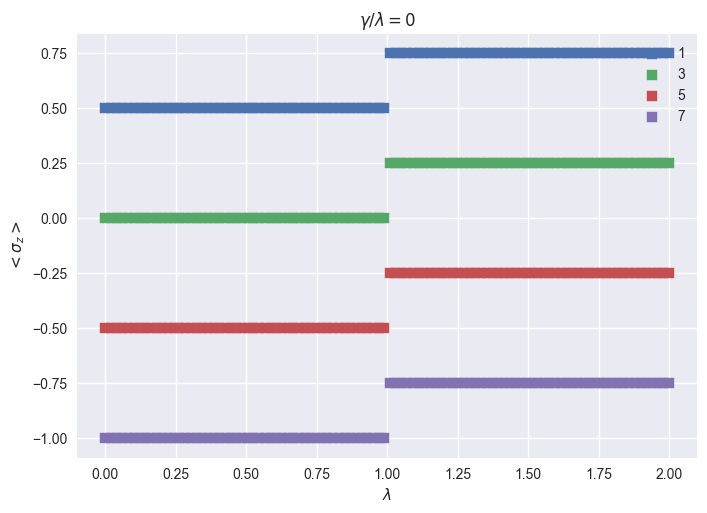

In [70]:
# plt.scatter(lambdaset, mag_sim[0], marker='s', label='0')
# plt.scatter(lambdaset, mag_sim[1], marker='s', label='1')
# plt.scatter(lambdaset, mag_sim[2], marker='s', label='2')
# plt.scatter(lambdaset, mag_sim[3], marker='s', label='3')
# plt.scatter(lambdaset, mag_sim[4], marker='s', label='4')
# plt.scatter(lambdaset, mag_sim[5], marker='s', label='5')
# plt.scatter(lambdaset, mag_sim[6], marker='s', label='6')
# plt.scatter(lambdaset, mag_sim[7], marker='s', label='7')
# plt.scatter(lambdaset, mag_sim[8], marker='s', label='8')
plt.scatter(lambdaset, mag_sim[1], marker='s', label='1')
plt.scatter(lambdaset, mag_sim[3], marker='s', label='3')
plt.scatter(lambdaset, mag_sim[5], marker='s', label='5')
plt.scatter(lambdaset, mag_sim[7], marker='s', label='7')


plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('$< \sigma_z > $')
plt.title('$\gamma / \lambda = 1$')
plt.grid(True)  # Add grid for better readability
plt.show()

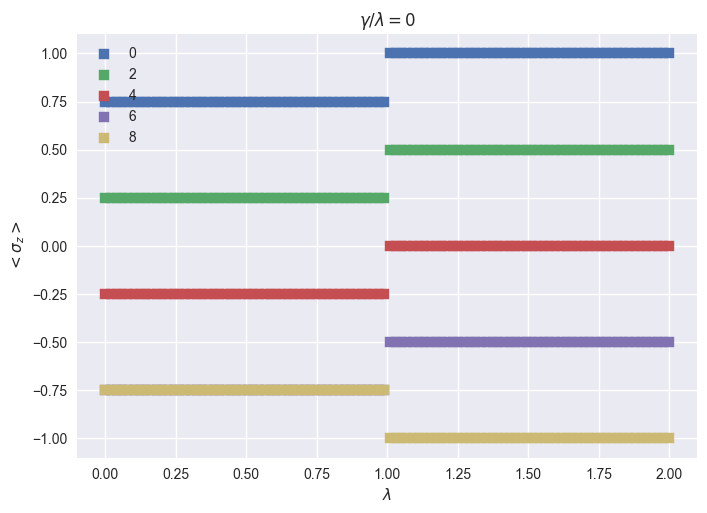

In [71]:
plt.scatter(lambdaset, mag_sim[0], marker='s', label='0')
plt.scatter(lambdaset, mag_sim[2], marker='s', label='2')
plt.scatter(lambdaset, mag_sim[4], marker='s', label='4')
plt.scatter(lambdaset, mag_sim[6], marker='s', label='6')
plt.scatter(lambdaset, mag_sim[8], marker='s', label='8')


plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('$< \sigma_z > $')
plt.title('$\gamma / \lambda = 1.5$')
plt.grid(True)  # Add grid for better readability
plt.show()

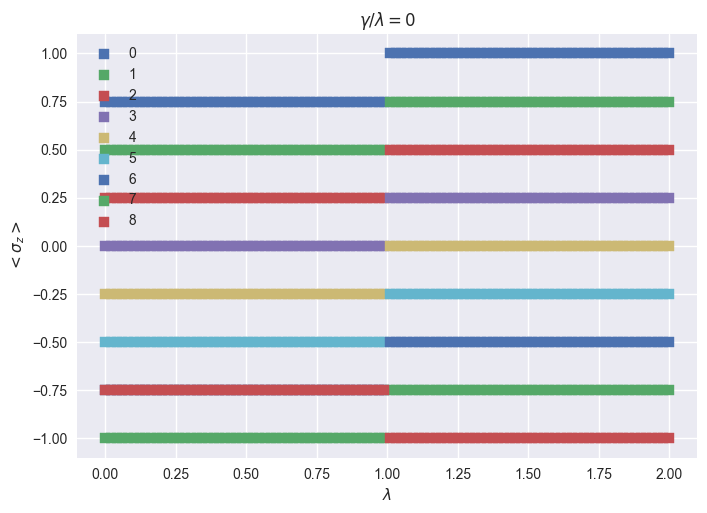

In [72]:
plt.scatter(lambdaset, mag_sim[0], marker='s', label='0')
plt.scatter(lambdaset, mag_sim[1], marker='s', label='1')
plt.scatter(lambdaset, mag_sim[2], marker='s', label='2')
plt.scatter(lambdaset, mag_sim[3], marker='s', label='3')
plt.scatter(lambdaset, mag_sim[4], marker='s', label='4')
plt.scatter(lambdaset, mag_sim[5], marker='s', label='5')
plt.scatter(lambdaset, mag_sim[6], marker='s', label='6')
plt.scatter(lambdaset, mag_sim[7], marker='s', label='7')
plt.scatter(lambdaset, mag_sim[8], marker='s', label='8')
# plt.scatter(lambdaset, mag_sim[1], marker='s', label='1')
# plt.scatter(lambdaset, mag_sim[3], marker='s', label='3')
# plt.scatter(lambdaset, mag_sim[5], marker='s', label='5')
# plt.scatter(lambdaset, mag_sim[7], marker='s', label='7')


plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('$< \sigma_z > $')
plt.title('$\gamma / \lambda = 0$')
plt.grid(True)  # Add grid for better readability
plt.show()

In [6]:


qc_transpiled = transpile(qc, basis_gates=['u3', 'cx'])

# Print the transpiled circuit


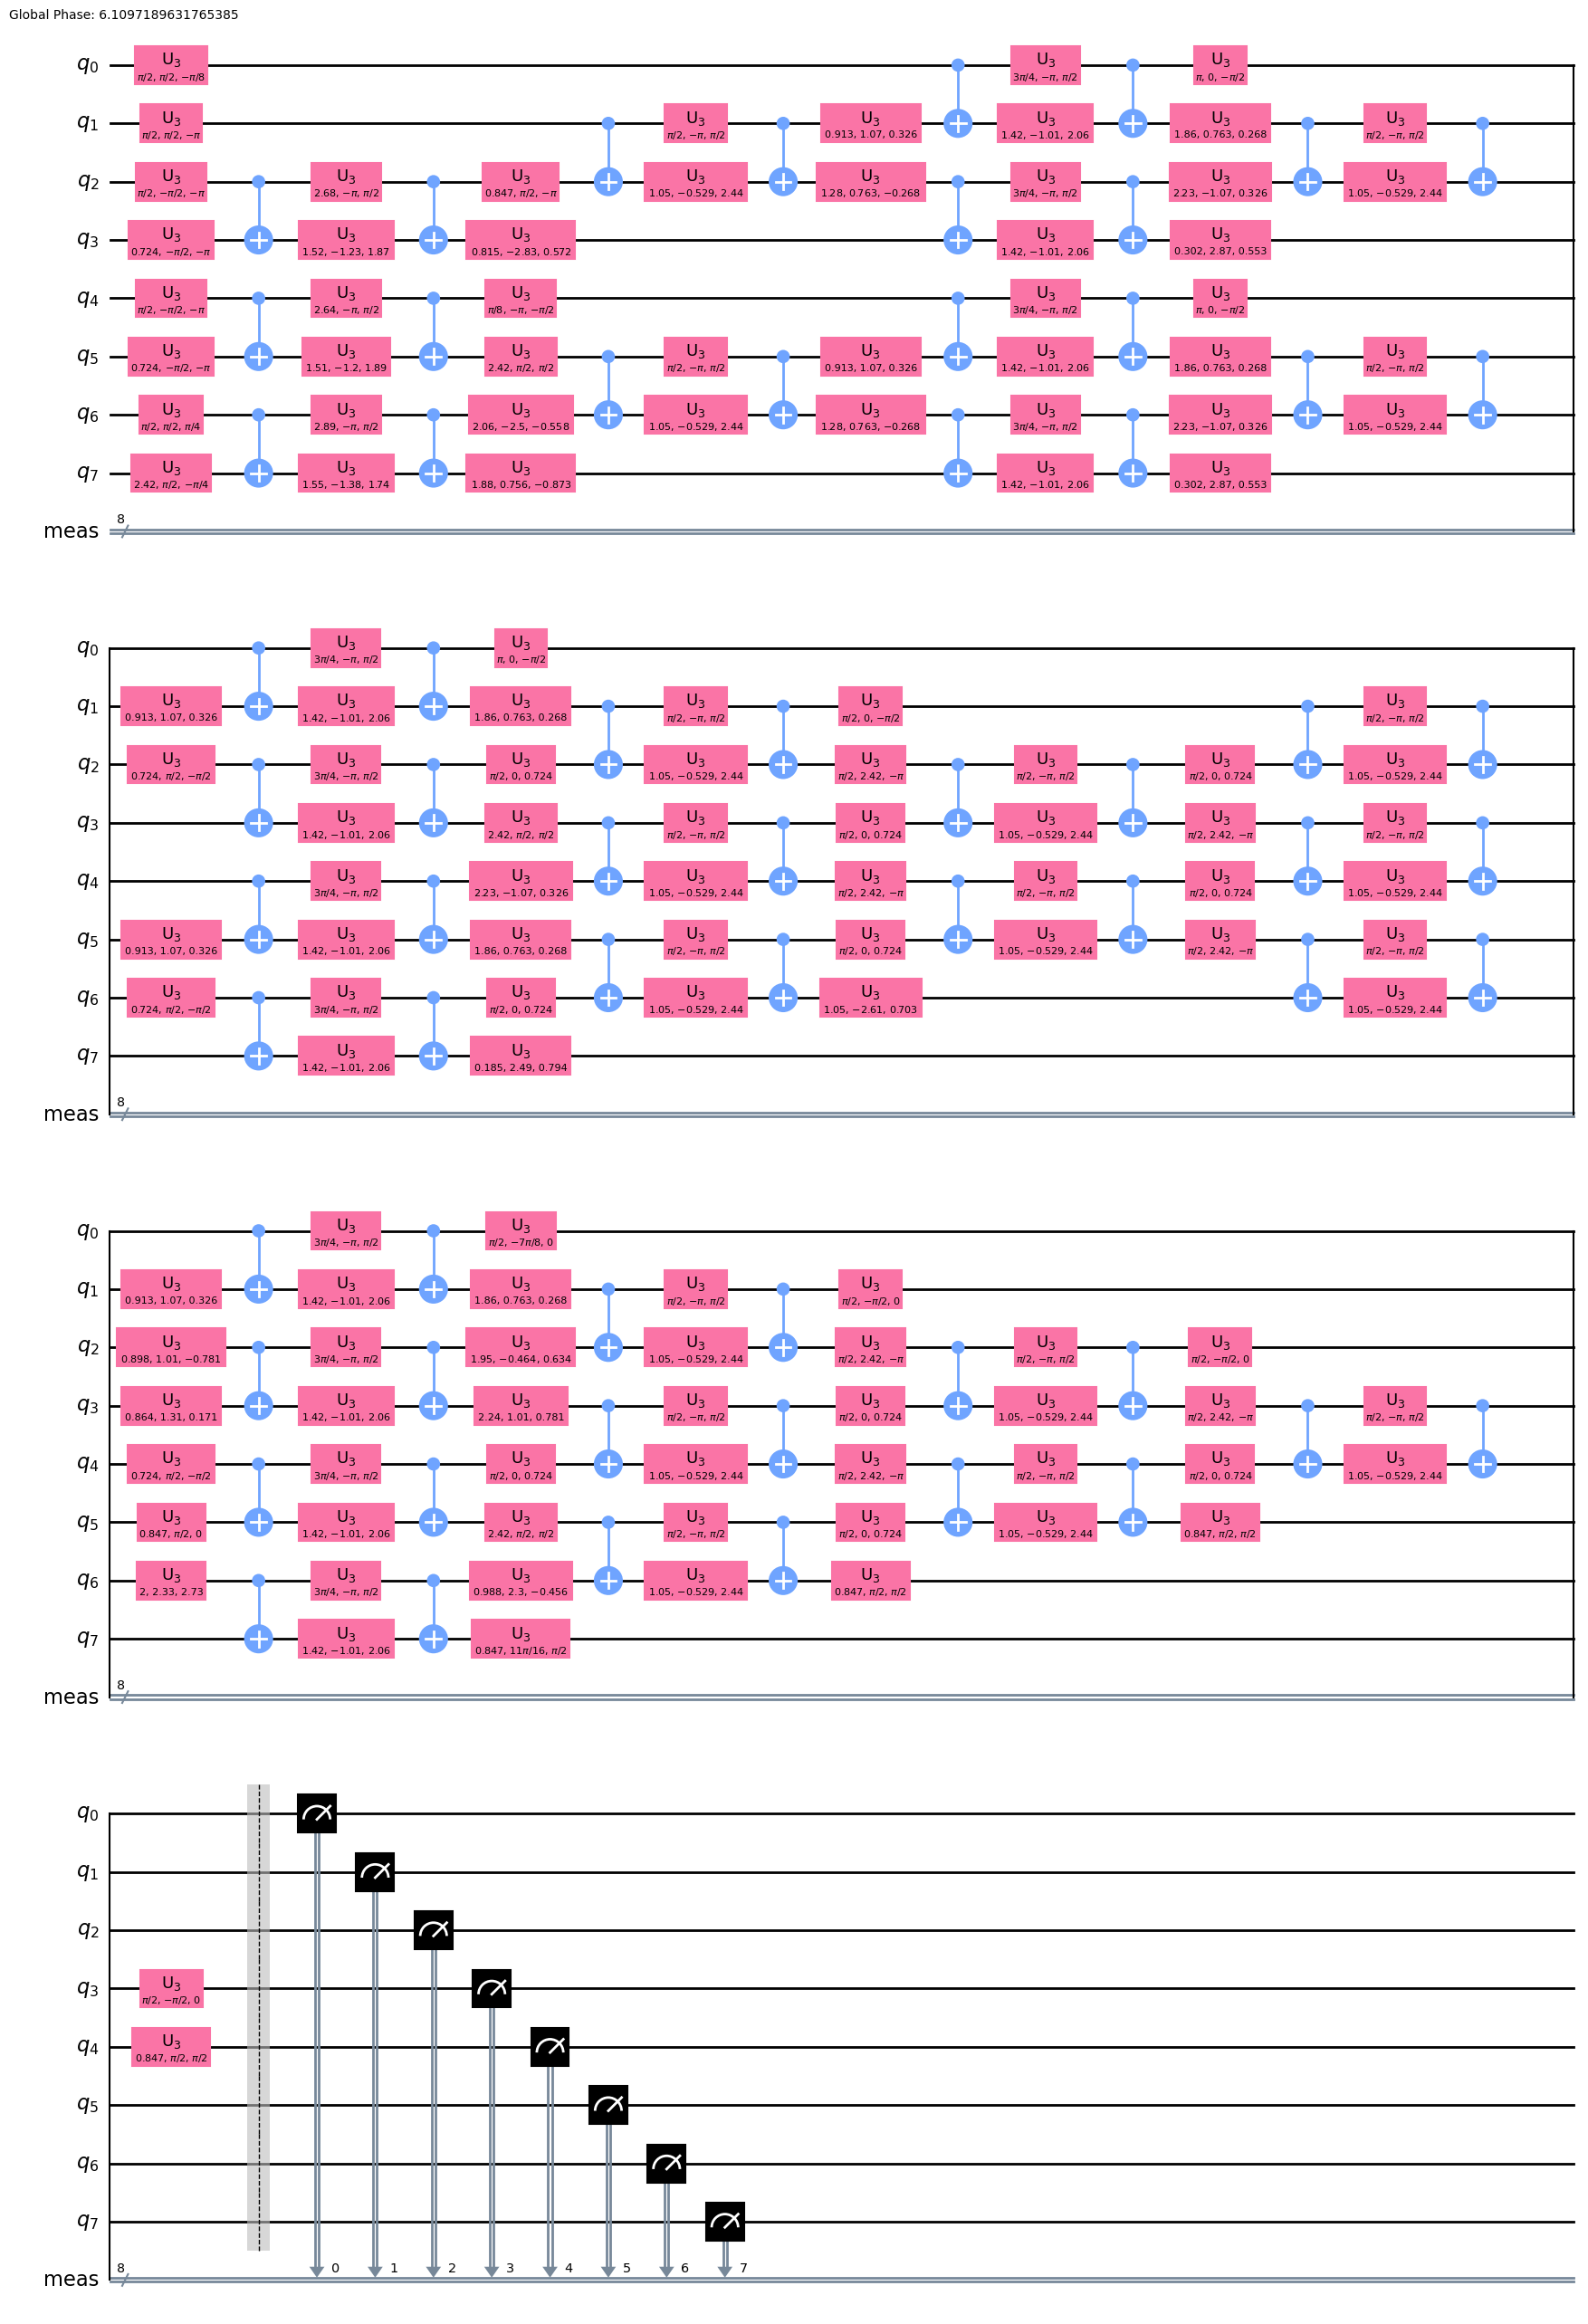

In [7]:
from qiskit.visualization import circuit_drawer

# Draw the circuit using matplotlib
circuit_drawer(qc_transpiled, output='mpl', filename='final_circuit.png')


In [ ]:
## For time evolution in different regimes

## For Hard-Core Regime, gamma = 0
lambdaset = [0.33, 0.66, 1, 1.33, 1.66]
gammaset = np.zeros_like(lambdaset)
magt = [[] for _ in range(lambdaset)]


for i in range(len(lambdaset)):
    lambdavar = lambdaset[i]
    gammavar = 1
    b0gate, b1gate, b2gate, b3gate = resetarrays(lambdavar, gammavar)

    for timestep in range(10):    
        t = timestep*0.25
            
        qc = QuantumCircuit(8)
        
        initial_states = [0, 0, 0, 0, 0, 0, 0, 0]  # 0 represents |0⟩ and 1 represents |1⟩

        for qubit_index, state in enumerate(initial_states):
            if state == 1:
                qc.x(qubit_index) 
        
        if lambdavar < 1:
            qc.x(7)
            
            
        qc.unitary(b0gate, [0,1])
        qc.unitary(b2gate, [2,3])
        qc.unitary(b1gate, [4,5])
        qc.unitary(b3gate, [6,7])
        qc.unitary(swapgate, [1,2])
        qc.unitary(swapgate, [5,6])
        qc.unitary(f0gate, [0,1])
        qc.unitary(f0gate, [2,3])
        qc.unitary(f0gate, [4,5])
        qc.unitary(f0gate, [6,7])
        qc.unitary(swapgate, [1,2])
        qc.unitary(swapgate, [5,6])
        qc.unitary(f0gate, [0,1])
        qc.unitary(f2gate, [2,3])
        qc.unitary(f0gate, [4,5])
        qc.unitary(f2gate, [6,7])
        qc.unitary(swapgate, [1,2])
        qc.unitary(swapgate, [5,6])
        qc.unitary(swapgate, [3,4])
        qc.unitary(swapgate, [2,3])
        qc.unitary(swapgate, [4,5])
        qc.unitary(swapgate, [1,2])
        qc.unitary(swapgate, [3,4])
        qc.unitary(swapgate, [5,6])
        qc.unitary(f0gate, [0,1])
        qc.unitary(f1gate, [2,3])
        qc.unitary(f2gate, [4,5])
        qc.unitary(f3gate, [6,7])
        qc.unitary(swapgate, [1,2])
        qc.unitary(swapgate, [3,4])
        qc.unitary(swapgate, [5,6])
        qc.unitary(swapgate, [2,3])
        qc.unitary(swapgate, [4,5])
        qc.unitary(swapgate, [3,4])

        simulator = Aer.get_backend('qasm_simulator')
        qc.barrier(range(8))
        qc.measure_all()
        shots = 1024
        job = execute(qc, simulator, shots = shots)
        results = job.result()
        counts = results.get_counts(qc)
        r1 = list(counts.keys())
        r2 = list(counts.values())
        M = 0
        for j in range(0, len(r1)):
            M = M + (8-2*digit_sum(r1[j])) * r2[j] / shots
        magt[i].append(M/4)